In [7]:
from roboflow import Roboflow

rf = Roboflow(api_key="dwwaqPsXFnw4yKlQnZZj")
project = rf.workspace("joseph-nelson").project("rock-paper-scissors")
version = project.version(1)
dataset = version.download("folder")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Rock-Paper-Scissors-1 in folder:: 100%|██████████| 2927/2927 [00:03<00:00, 974.48it/s] 


In [6]:
import os

training_folder_name = 'Rock-Paper-Scissors-1/train'
testing_folder_name = 'Rock-Paper-Scissors-1/test'
validation_folder_name = 'Rock-Paper-Scissors-1/valid'

img_size = (300, 300)

classes = sorted(os.listdir(training_folder_name))
print(classes)

['paper', 'rock', 'scissors']


In [7]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Import from tensorflow.keras.preprocessing.image

batch_size = 30

print("Getting Data...")
datagen = ImageDataGenerator(rescale=1./255, # normalize pixel values
                             validation_split=0.3) # hold back 30% of the images for validation

print("Preparing training dataset...")
train_generator = datagen.flow_from_directory(
    training_folder_name,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training') # set as training data

print("Preparing validation dataset...")
validation_generator = datagen.flow_from_directory(
    training_folder_name,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation') # set as validation data

Getting Data...
Preparing training dataset...
Found 1764 images belonging to 3 classes.
Preparing validation dataset...
Found 756 images belonging to 3 classes.


In [9]:
# Define a CNN classifier network
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense
from keras import optimizers
import tensorflow as tf

#Dense is the fully connected layer
#Flatten is used after all CNN layers and before fully connected layer
#Conv2D is the 2D convolution layer
#MaxPooling2D is the 2D maxx pooling layer

# Define the model as a sequence of layers
model = Sequential()

# The input layer accepts an image and applies a convolution that uses 32 6x6 filters and a rectified linear unit activation function
model.add(Conv2D(32, (6, 6), input_shape=train_generator.image_shape, activation='relu'))

# Next we'll add a max pooling layer with a 2x2 patch
model.add(MaxPooling2D(pool_size=(2,2)))

# We can add as many layers as we think necessary - here we'll add another convolution layer and another and max poolinglayer
model.add(Conv2D(32, (6, 6), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Now we'll flatten the feature maps and generate an output layer with a predicted probability for each class
model.add(Flatten())
model.add(Dense(train_generator.num_classes, activation='softmax'))

# We'll use the ADAM optimizer
#other optimizers can also be used for example SGD stochastic gradient descent
opt = tf.optimizers.Adam(learning_rate=0.001)

# With the layers defined, we can now compile the model for categorical (multi-class) classification
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

print(model.summary())

c:\Users\SLO\Documents\GitHub\IE-University\myenv312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 295, 295, 32)   │         3,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 147, 147, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 142, 142, 32)   │        36,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 71, 71, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 161312)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │       483,939 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 524,323 (2.00 MB)

 Trainable params: 524,323 (2.00 MB)

 Non-trainable params: 0 (0.00 B)

None


In [10]:
# Train the model over 5 epochs
num_epochs = 5
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // batch_size,
    epochs = num_epochs)

Epoch 1/5


c:\Users\SLO\Documents\GitHub\IE-University\myenv312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


58/58 ━━━━━━━━━━━━━━━━━━━━ 48s 818ms/step - accuracy: 0.5351 - loss: 2.8843 - val_accuracy: 0.6307 - val_loss: 1.5507
Epoch 2/5
 1/58 ━━━━━━━━━━━━━━━━━━━━ 41s 729ms/step - accuracy: 0.7333 - loss: 0.4594

c:\Users\SLO\Documents\GitHub\IE-University\myenv312\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


58/58 ━━━━━━━━━━━━━━━━━━━━ 8s 119ms/step - accuracy: 0.7333 - loss: 0.4594 - val_accuracy: 0.6560 - val_loss: 1.4238
Epoch 3/5
58/58 ━━━━━━━━━━━━━━━━━━━━ 52s 899ms/step - accuracy: 0.9684 - loss: 0.1433 - val_accuracy: 0.6933 - val_loss: 1.3112
Epoch 4/5
58/58 ━━━━━━━━━━━━━━━━━━━━ 9s 151ms/step - accuracy: 1.0000 - loss: 0.0550 - val_accuracy: 0.6933 - val_loss: 1.3095
Epoch 5/5
58/58 ━━━━━━━━━━━━━━━━━━━━ 56s 960ms/step - accuracy: 0.9945 - loss: 0.0329 - val_accuracy: 0.7027 - val_loss: 1.7490


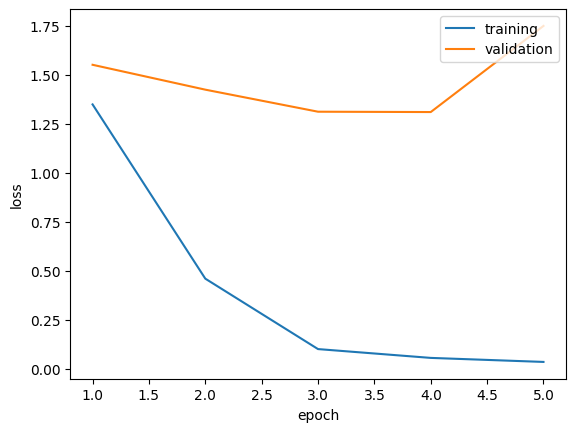

In [11]:
from matplotlib import pyplot as plt

# Get the number of validation loss values recorded during training
num_val_losses = len(history.history["val_loss"])
epoch_nums = range(1, num_val_losses + 1)

training_loss = history.history["loss"]
validation_loss = history.history["val_loss"]
plt.plot(epoch_nums, training_loss[:num_val_losses]) # Plot training loss for the same number of epochs as validation loss
plt.plot(epoch_nums, validation_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

Generating predictions from validation data...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step


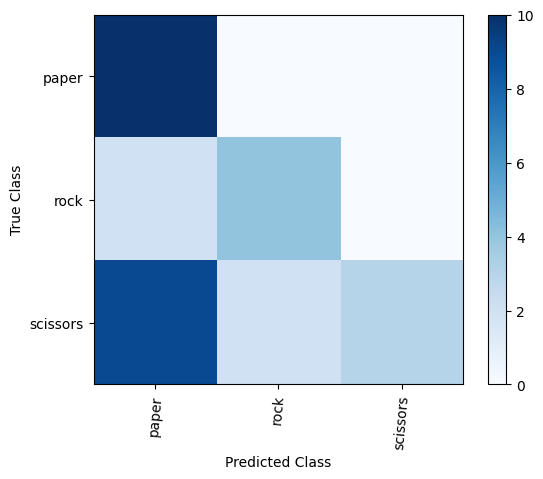

In [12]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

print("Generating predictions from validation data...")
# Get the image and label arrays for the first batch of validation data
x_test = validation_generator[0][0]
y_test = validation_generator[0][1]

# Use the moedl to predict the class
class_probabilities = model.predict(x_test)

# The model returns a probability value for each class
# The one with the highest probability is the predicted class
predictions = np.argmax(class_probabilities, axis=1)

# The actual labels are hot encoded (e.g. [0 1 0], so get the one with the value 1
true_labels = np.argmax(y_test, axis=1)

# Plot the confusion matrix
cm = confusion_matrix(true_labels, predictions)
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=85)
plt.yticks(tick_marks, classes)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()